#importing all the necessary libraries as follows

In [ ]:
import numpy as np 
import pandas as pd 
import random 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import math 
from keras.utils.vis_utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer 
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import pathlib
import os
import zipfile 


##Data we are using has 10 classes and each class has 1000 images.
##it's divided into train and test set with 90:10 ratio respectively  
##saved the data on google drive and now importing it on colab to use the data

In [ ]:
#importing the dataset using os module 
dataset_path = '/content/drive/MyDrive/images_final'

In [ ]:
def display_random_image(dir, class_type):
  img_dir = dir + "/" + class_type
  files = os.listdir(img_dir)
  img_name = random.choice(files)
  img = mpimg.imread(img_dir + '/' + img_name)
  plt.imshow(img)
  plt.title(class_type)
  plt.axis('off')
  print(f'image shape: {img.shape}')

image shape: (383, 512, 3)


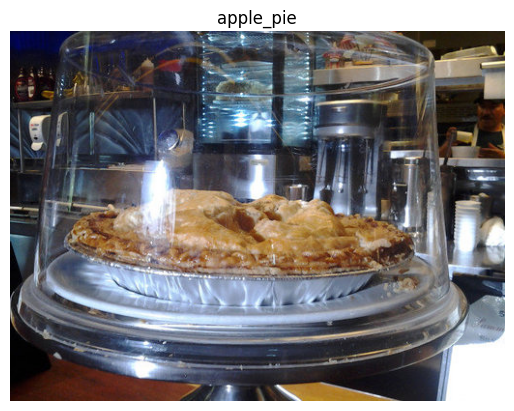

In [ ]:
display_random_image('/content/drive/MyDrive/images_final/train', 'apple_pie')

In [ ]:
#create training data and test data
train_dir = '/content/drive/MyDrive/images_final/train/'
test_dir = '/content/drive/MyDrive/images_final/test/'

In [ ]:
#normalize the data
train_norm = ImageDataGenerator(rescale=1/255)
test_norm = ImageDataGenerator(rescale= 1/255)

train_data = train_norm.flow_from_directory(train_dir,
                                            target_size = (256, 256),
                                            batch_size = 16,
                                            class_mode = 'categorical')

test_data = test_norm.flow_from_directory(test_dir,
                                          target_size = (256, 256),
                                          batch_size = 16,
                                          class_mode = 'categorical')

Found 8000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


##prepare a multi-class CNN model

In [ ]:
model_1 = Sequential([
    Conv2D(10, 3, input_shape=(256,256,3)),
    Activation(activation='relu'),
    Conv2D(10, 3),
    Activation(activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, input_shape=(256,256,3)),
    Activation(activation='relu'),
    Conv2D(10, 3),
    Activation(activation='relu'),
    MaxPool2D(),
    Flatten(),  
    Dense(10),
    Activation(activation='softmax') 
])

model_1.compile(loss='categorical_crossentropy',
                optimizer= tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history = model_1.fit(train_data,
                      epochs = 5,
                      steps_per_epoch = len(train_data),

                      validation_data = test_data,
                      validation_steps = len(test_data))

Epoch 1/5
500/500 [==============================] - 1384s 3s/step - loss: 2.0825 - accuracy: 0.2531 - val_loss: 1.8794 - val_accuracy: 0.3150
Epoch 2/5
500/500 [==============================] - 64s 128ms/step - loss: 1.6609 - accuracy: 0.4200 - val_loss: 1.7934 - val_accuracy: 0.3520
Epoch 3/5
500/500 [==============================] - 64s 128ms/step - loss: 1.0561 - accuracy: 0.6509 - val_loss: 2.1610 - val_accuracy: 0.3350
Epoch 4/5
500/500 [==============================] - 64s 129ms/step - loss: 0.3901 - accuracy: 0.8788 - val_loss: 3.3320 - val_accuracy: 0.2810
Epoch 5/5
500/500 [==============================] - 64s 128ms/step - loss: 0.1349 - accuracy: 0.9599 - val_loss: 4.7480 - val_accuracy: 0.2880


In [ ]:
model_1.evaluate(test_data)

63/63 [==============================] - 7s 103ms/step - loss: 4.7480 - accuracy: 0.2880


[4.748015880584717, 0.2879999876022339]

<Axes: >

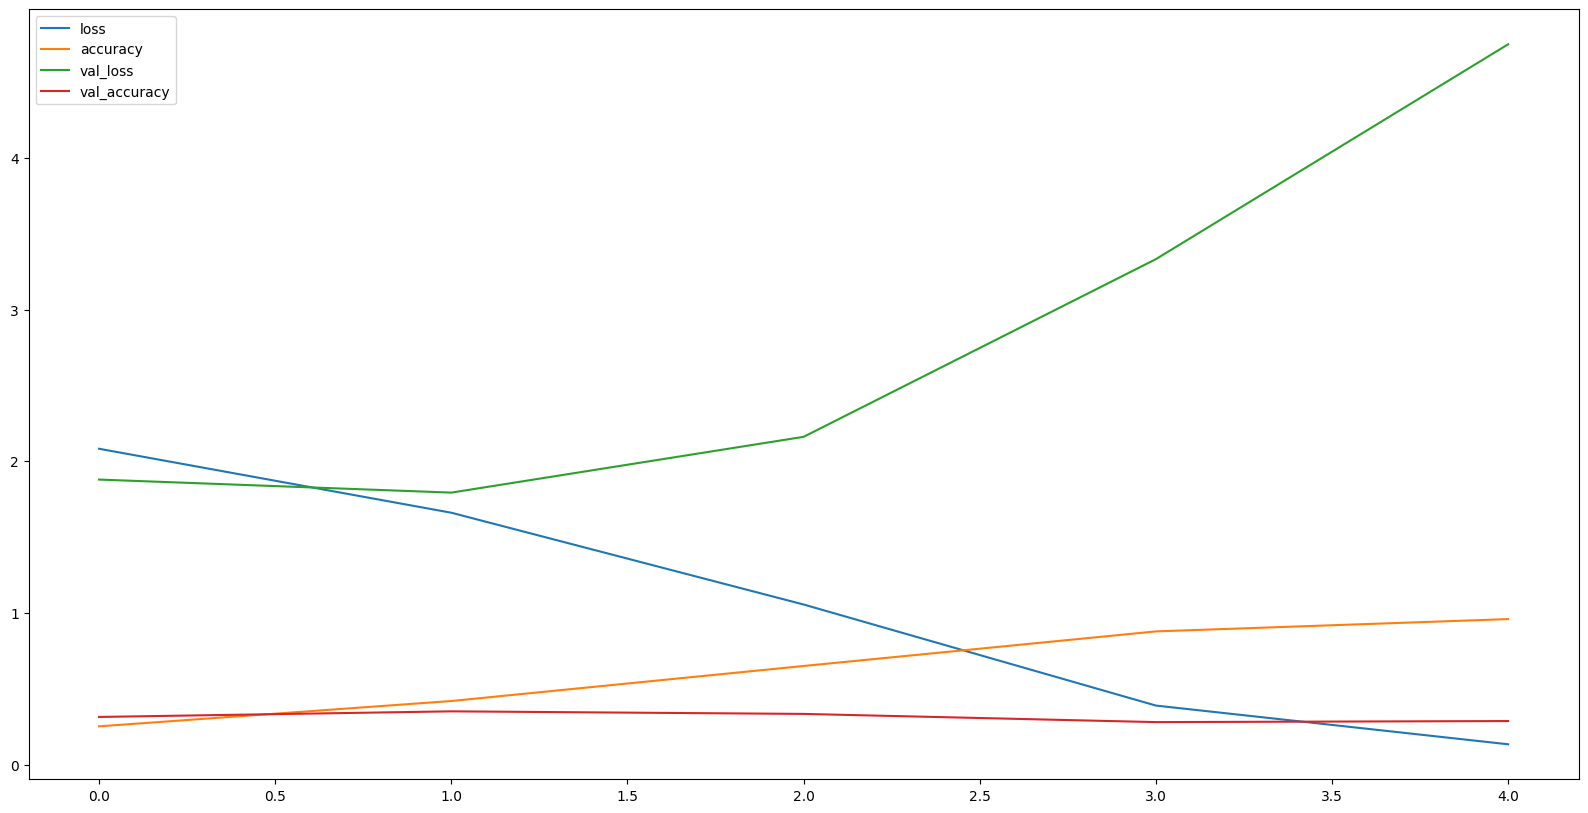

In [ ]:
pd.DataFrame(history.history).plot(figsize=(20,10))

##Augmentation to improve the validation acuracy

In [ ]:
data_augmentation = Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2)
])

In [ ]:
model_2 = Sequential([
    data_augmentation,
    Conv2D(10, 3, input_shape=(256,256,3)),
    Activation(activation='relu'),
    Conv2D(10, 3),
    Activation(activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, input_shape=(256,256,3)),
    Activation(activation='relu'),
    Conv2D(10, 3),
    Activation(activation='relu'),
    MaxPool2D(),
    Flatten(),  
    Dense(10),
    Activation(activation='softmax') 
])

model_2.compile(loss='categorical_crossentropy',
                optimizer= tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history = model_2.fit(train_data,
                      epochs = 5,
                      steps_per_epoch = len(train_data),

                      validation_data = test_data,
                      validation_steps = len(test_data))

Epoch 1/5
500/500 [==============================] - 70s 132ms/step - loss: 2.0413 - accuracy: 0.2603 - val_loss: 1.8509 - val_accuracy: 0.3350
Epoch 2/5
500/500 [==============================] - 69s 137ms/step - loss: 1.8297 - accuracy: 0.3565 - val_loss: 1.7599 - val_accuracy: 0.3740
Epoch 3/5
500/500 [==============================] - 64s 128ms/step - loss: 1.7564 - accuracy: 0.3909 - val_loss: 1.7680 - val_accuracy: 0.3630
Epoch 4/5
500/500 [==============================] - 65s 131ms/step - loss: 1.6851 - accuracy: 0.4189 - val_loss: 1.7595 - val_accuracy: 0.4040
Epoch 5/5
500/500 [==============================] - 65s 130ms/step - loss: 1.6258 - accuracy: 0.4284 - val_loss: 1.6254 - val_accuracy: 0.4210


In [ ]:
class_names = os.listdir('/content/drive/MyDrive/images_final/train')
class_names.sort()
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

(-0.5, 1199.5, 1199.5, -0.5)

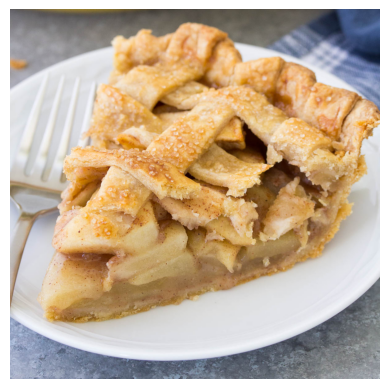

In [ ]:
#prediction
apple_pie = mpimg.imread('/content/drive/MyDrive/apple-pie-1200-square-592-2.jpg')
plt.imshow(apple_pie)
plt.axis(False)

##make prediction with the above picture

In [ ]:
apple_pie.shape

(1200, 1200, 3)

In [ ]:
def normalize_and_resize(img_loc):
  my_img = tf.io.read_file(img_loc)
  my_img = tf.image.decode_image(my_img)
  my_img = tf.image.resize(my_img, size = [256,256])
  my_img = my_img / 255
  return my_img 

In [ ]:
apple_pie = normalize_and_resize('/content/drive/MyDrive/apple-pie-1200-square-592-2.jpg')
apple_pie

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[0.38370097, 0.3764706 , 0.37855393],
        [0.38370097, 0.3764706 , 0.37855393],
        [0.37844285, 0.37121248, 0.3732958 ],
        ...,
        [0.211286  , 0.28971738, 0.4348154 ],
        [0.2027765 , 0.28120786, 0.41061965],
        [0.19485295, 0.27328432, 0.40269607]],

       [[0.40392157, 0.39215687, 0.41960785],
        [0.40392157, 0.39215687, 0.41960785],
        [0.4016276 , 0.3898629 , 0.41731387],
        ...,
        [0.21654412, 0.2949755 , 0.44007352],
        [0.2056296 , 0.28406096, 0.41347274],
        [0.19358915, 0.27202052, 0.4014323 ]],

       [[0.41788065, 0.4139591 , 0.43356693],
        [0.40955883, 0.40563726, 0.4252451 ],
        [0.40545726, 0.4015357 , 0.42114353],
        ...,
        [0.2172143 , 0.29564568, 0.4407437 ],
        [0.20040211, 0.27883348, 0.42393154],
        [0.20675169, 0.28518307, 0.4302811 ]],

       ...,

       [[0.6543313 , 0.6974686 , 0.7697725 ],
        [0.63

In [ ]:
prediction = model_2.predict(tf.expand_dims(apple_pie, axis = 0))
prediction

1/1 [==============================] - 0s 197ms/step


array([[0.20898297, 0.01184961, 0.29126576, 0.00539704, 0.03614558,
        0.00422018, 0.02595155, 0.00284824, 0.11060099, 0.30273804]],
      dtype=float32)

In [ ]:
class_names[np.argmax(prediction)]

'breakfast_burrito'

#model still isn't good enough 
#lets go towards transfer learning

In [ ]:
import tensorflow_hub as hub
resnet_url = ('https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5')
resnet_layer = hub.KerasLayer(resnet_url,
                              trainable = False,
                              input_shape = (256,256,3))
resnet_model = tf.keras.Sequential([
    resnet_layer, 
    Dense(10, activation = 'softmax')
])

In [ ]:
resnet_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              23564800  
                                                                 
 dense_2 (Dense)             (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:
resnet_model.compile(loss = 'categorical_crossentropy',
                     optimizer= tf.keras.optimizers.Adam(),
                     metrics = ['accuracy'])

In [ ]:
resnet_history = resnet_model.fit(train_data,
                                  epochs = 5,
                                  steps_per_epoch = len(train_data),
                                  validation_data=test_data)

Epoch 1/5
500/500 [==============================] - 76s 142ms/step - loss: 0.9391 - accuracy: 0.6860 - val_loss: 0.7180 - val_accuracy: 0.7530
Epoch 2/5
500/500 [==============================] - 67s 134ms/step - loss: 0.5830 - accuracy: 0.8089 - val_loss: 0.6398 - val_accuracy: 0.7940
Epoch 3/5
500/500 [==============================] - 67s 133ms/step - loss: 0.4820 - accuracy: 0.8406 - val_loss: 0.6315 - val_accuracy: 0.7950
Epoch 4/5
500/500 [==============================] - 70s 140ms/step - loss: 0.4133 - accuracy: 0.8635 - val_loss: 0.6364 - val_accuracy: 0.7830
Epoch 5/5
500/500 [==============================] - 69s 139ms/step - loss: 0.3622 - accuracy: 0.8836 - val_loss: 0.6135 - val_accuracy: 0.7840


In [ ]:
prediction = resnet_model.predict(tf.expand_dims(apple_pie, axis = 0))
prediction

1/1 [==============================] - 2s 2s/step


array([[7.9316068e-01, 3.9611482e-03, 7.1396977e-02, 2.1096678e-03,
        8.8132834e-03, 9.0989145e-03, 2.8465176e-03, 1.0818653e-04,
        1.0076866e-01, 7.7359504e-03]], dtype=float32)

In [ ]:
class_names[np.argmax(prediction)]

'apple_pie'

<Axes: >

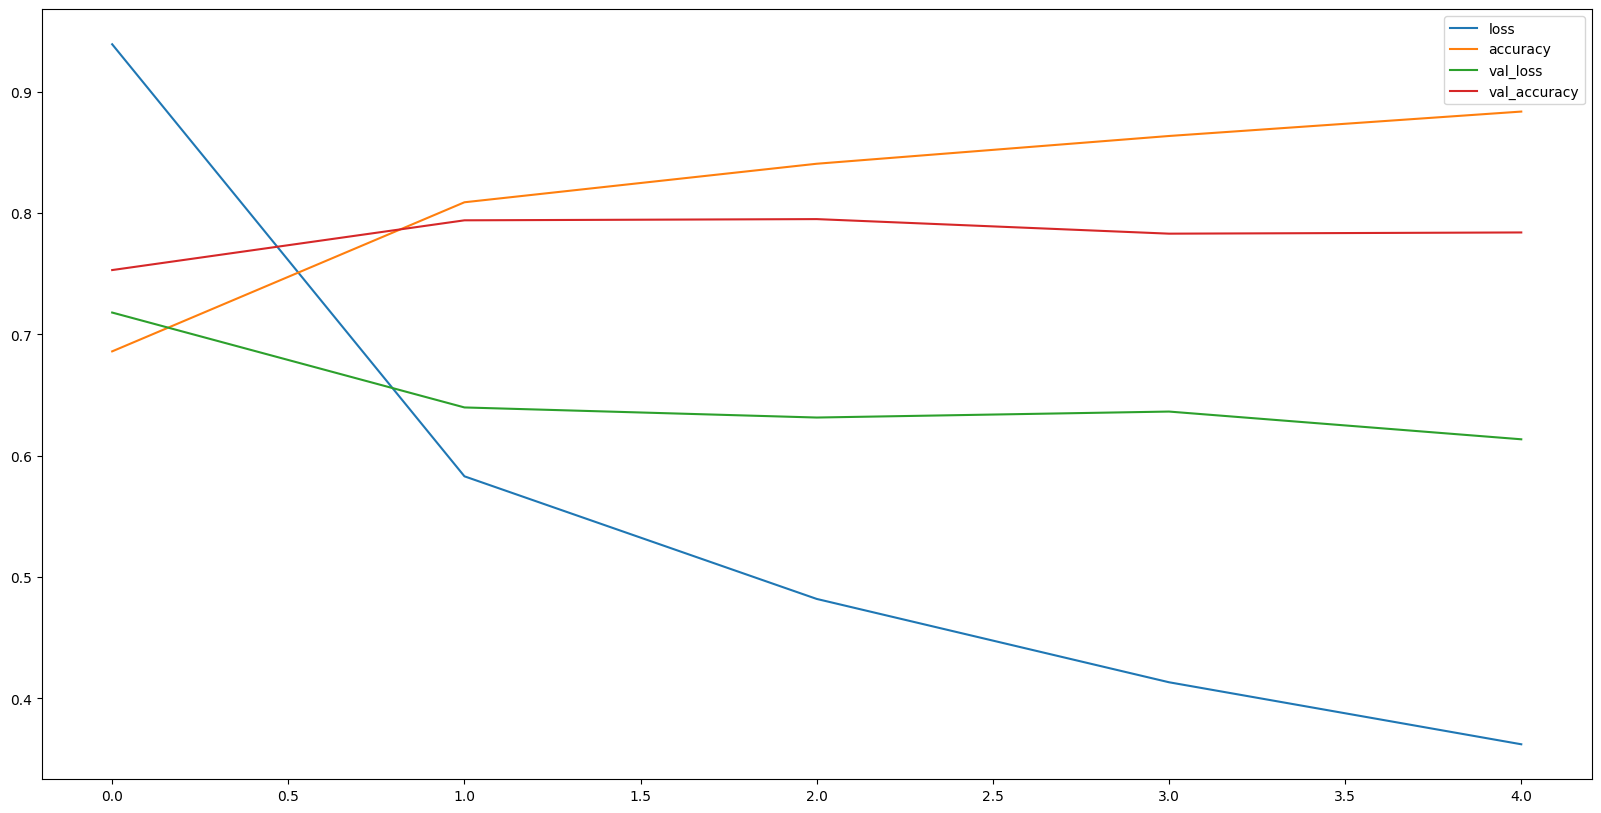

In [ ]:
pd.DataFrame(resnet_history.history).plot(figsize=(20,10))

##as we can see, it's a lot better to use transfer learning